# Your First Neural Network

### Exercise objectives
- Write your first Neural Network
- Inspect some of the most important hyperparameters of Neural Networks

<hr>
<hr>


In this exercise, you will build your first Neural Network that will separate two classes.
Each data $X$ has only two coordinates $X = (x_1, x_2)$ and belongs to either the class 0 or to the class 1. It is called the `moons dataset`. 

As there are only two features, the points can be represented on a 2D-scatterplot, where the colors correspond to the two available classes: $\color{blue}{blue}$ and $\color{red}{red} $. Here is an example of such data : 

![Two moons](moons_example.png)



## 1. Create data

Here, we will use the scikit-learn `make_moons` function [(see documentation here)](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) to create 2 moons that cannot be linearly separated. Each moon correspond to a class.

In [18]:
from sklearn.datasets import make_moons
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential
#from keras.layers import Dense, Activation
from keras import layers

In [19]:
### Data generation

moons = make_moons(n_samples=10, noise=0.05)

In [20]:
moons[0]

array([[ 1.06163666,  0.04627465],
       [-0.0092643 ,  0.45438113],
       [ 0.36855922, -0.28719416],
       [ 1.77564896, -0.24177496],
       [-0.7323222 ,  0.6964181 ],
       [ 0.00599679,  1.02249711],
       [ 2.02061305,  0.51134304],
       [ 0.65353941,  0.71822932],
       [-0.99624939,  0.04445939],
       [ 0.92687736, -0.54969309]])

In [21]:
moons[0][:,0]
moons[0][:,1]

array([ 0.04627465,  0.45438113, -0.28719416, -0.24177496,  0.6964181 ,
        1.02249711,  0.51134304,  0.71822932,  0.04445939, -0.54969309])

In [22]:
moons[1]

array([0, 1, 1, 1, 0, 0, 1, 0, 0, 1])

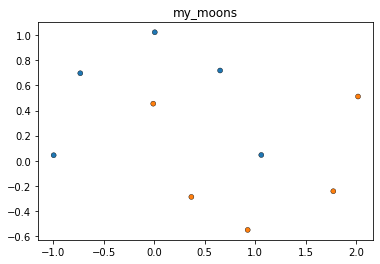

In [23]:
### This function allows to plot the two moons

sns.scatterplot(
    x=moons[0][:,0], y = moons[0][:,1], hue=moons[1], marker="o", s=25, edgecolor="k", legend=False
).set_title("my_moons")

def plot_moons(n_samples=10, noise=0.05):
    moons = make_moons(n_samples=n_samples, noise=noise)
    sns.scatterplot(
    x=moons[0][:,0], y = moons[0][:,1], hue=moons[1], marker="o", s=25, edgecolor="k", legend=False
    ).set_title("my_moons")
    plt.show()


In [24]:
np.arange(0.05,0.55,0.05).shape
#np.arange(50,1050,100).shape

(10,)

❓ Play with the number of samples and the noise to discover the effects on the moons dataset, by plotting the moons for different values

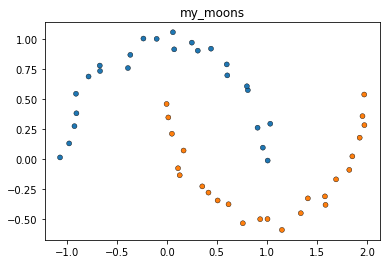

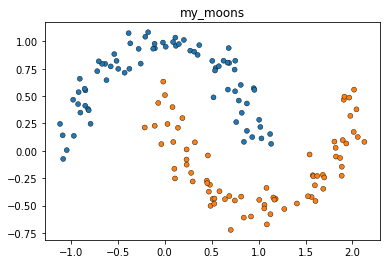

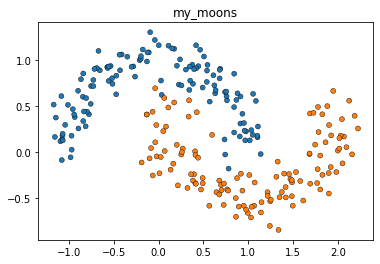

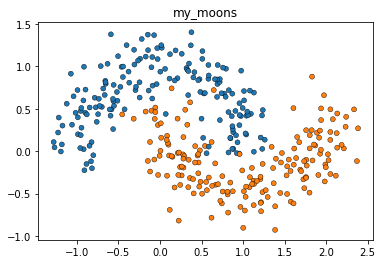

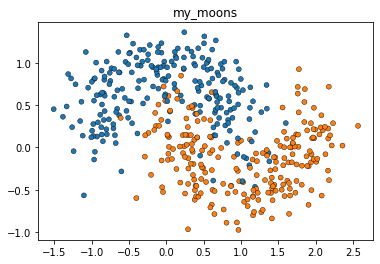

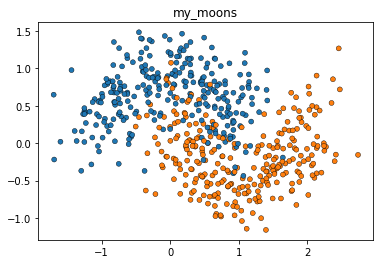

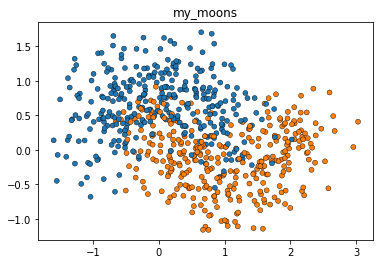

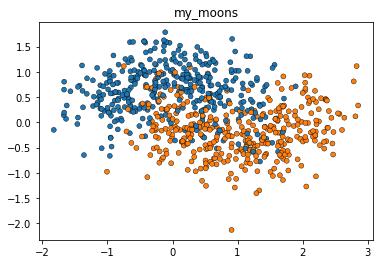

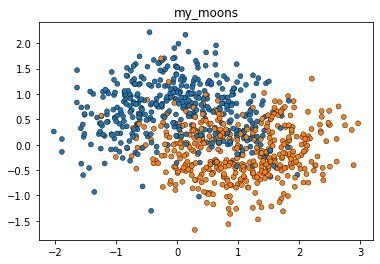

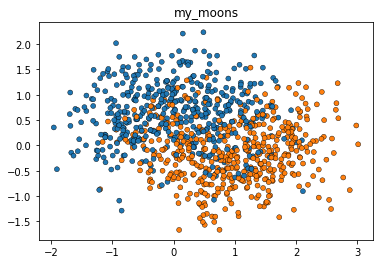

In [25]:
for i,j in zip(range(50,1050,100),np.arange(0.05,0.55,0.05)):
    plot_moons(i,j)

❓ Draw 250 samples of the data with a noise equal to 0.20 (random state being 0) and split the initial dataset into a train and test set (size: 70/30%)

*Remark* : Please call the variables `X_train`, `y_train`, `X_test` and `y_test`

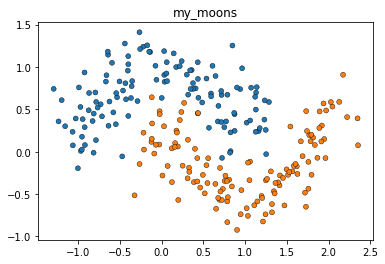

In [26]:
plot_moons(250,0.2)
X , y = make_moons(n_samples=250, noise=0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

## 2. Simple model

You will now define your first neural network.
The architecture of your model should have : 
- a first layer with 5 neurons, with a `relu` activation function and the correct input dimension
- a output layer suited to your 2-class classification task.


❓ Complete the next function with the previous architecture

In [27]:
X[0].shape

(2,)

In [28]:
def initialize_model():
    model = Sequential([
        layers.Input(shape=(2,)),
        layers.Dense(5, activation='relu'),
        layers.Dense(1, activation="softmax")
    ])
    return model

model = initialize_model()

❗ **Remark** ❗ Briefly speaking, the **`.compile()`** tells your algorithm how to optimize the weights of your network once it will be fit on real data. **`binary_crossentropy`** is the "log-loss" that you have have to use and explain

❓ How many parameters does the model have?  
Double check using the **`.summary()`** function which displays the stack of layers, the shape of the output after each layer, and the number of parameters of each layer. Use this function to check that you have 21 parameters i.e. weights in your model.

In [29]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 5)                 15        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


You are now ready to train your algorithm on the training set:

In [30]:
history = model.fit(
    X_train,
    y_train,
    #batch_size = 2,
    validation_split=0.2,
    #verbose=0,
    epochs=50
    )

Epoch 1/50
5/5 [==============================] - 1s 90ms/step - loss: 0.8056 - accuracy: 0.5071 - val_loss: 0.7888 - val_accuracy: 0.4571
Epoch 2/50
5/5 [==============================] - 0s 7ms/step - loss: 0.8010 - accuracy: 0.5071 - val_loss: 0.7845 - val_accuracy: 0.4571
Epoch 3/50
5/5 [==============================] - 0s 8ms/step - loss: 0.7965 - accuracy: 0.5071 - val_loss: 0.7802 - val_accuracy: 0.4571
Epoch 4/50
5/5 [==============================] - 0s 10ms/step - loss: 0.7924 - accuracy: 0.5071 - val_loss: 0.7761 - val_accuracy: 0.4571
Epoch 5/50
5/5 [==============================] - 0s 7ms/step - loss: 0.7880 - accuracy: 0.5071 - val_loss: 0.7719 - val_accuracy: 0.4571
Epoch 6/50
5/5 [==============================] - 0s 7ms/step - loss: 0.7841 - accuracy: 0.5071 - val_loss: 0.7680 - val_accuracy: 0.4571
Epoch 7/50
5/5 [==============================] - 0s 8ms/step - loss: 0.7801 - accuracy: 0.5071 - val_loss: 0.7641 - val_accuracy: 0.4571
Epoch 8/50
5/5 [================

### Fit history

`history` contains information about the training.

❓ Inspect all its attributes using `history.__dict__`. You will see epoch-by-epoch info stored in `history.history`

In [31]:
history.__dict__.keys()

dict_keys(['validation_data', 'model', '_chief_worker_only', '_supports_tf_logs', 'history', 'params', 'epoch'])

❓ Plot the history of the train loss using the following function

In [32]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 1])
  plt.xlabel('Epoch')
  plt.ylabel('binary_crossentropy')
  plt.legend()
  plt.grid(True)

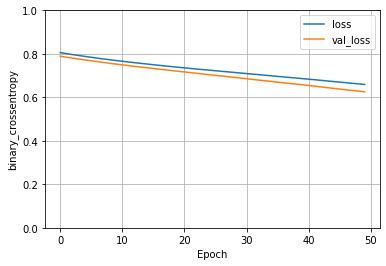

In [33]:
plot_loss(history)

### Predict & Evaluate performance on test set

You can predict `y_pred` using the **`.predict()`** method.

In [34]:
y_pred = model.predict(X_test)

You can use the **`.evaluate()`** method to return the **`loss value`** &  and the **`performance metrics`**

In [35]:
eval = model.evaluate(X_test)
eval

3/3 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


[0.0, 0.0]

- The first element corresponds to the **loss** value, set to `"binary_crossentropy"` in `model.compile()`. Its value is hard to interpret.

- The second element is the **metrics**, that we set to `"accuracy"`

❓ What is your accuracy on the test test? Store the value as a `float` in the `accuracy` variable.

In [36]:
accuracy = eval[0]

❓ Check your prediction visually by using our `plot_decision_regions` available in `utils/plots.py`. It looks a bit underfitted, right? We will create a deeper network next!

In [37]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    """Plot the 2D-decision region of a classifier with matplotlib along its first two dimensions X[:,0] and X[:,1].

    Args:
        X (np.Array): (n,p) dataset to classify
        y (np.Array): (n,) array of labels. Works well up to 5 unique labels.
        classifier: fitted classifier with `.predict()` method 
        test_idx (int, optional):  Index of test datapoints within X to display with a larger mark style. Defaults to None.
        resolution (float, optional): Resolution of the meshgrid used to colorize regions. Defaults to 0.02.
    """

    # setup marker generator and color map up for up to 5 classes
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, color=cmap(idx),
                    marker='x', label=cl)

    # Plot test samples if they exist
    if not test_idx is None:
        X_test, y_test = X[test_idx, :], y[test_idx]
        for idx, cl in enumerate(np.unique(y_test)):
            plt.scatter(x=X_test[y_test == cl, 0], y=X_test[y_test == cl, 1],
                        alpha=1, color=cmap(idx),
                        linewidths=1, marker='o', s=55, label=f'test {cl}')
    plt.legend()


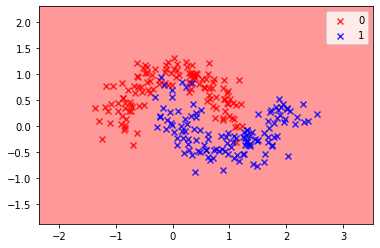

In [38]:
plot_decision_regions(X,y,model)

## 3. Variations

❓ Relaunch the model on 500 iterations
- Don't forget to call the `initialize_model` function, otherwise, your initial parameters will be those you have already learnt on the previous fit!!)
- Plot the history to see how the loss changed over the different epochs/iterations.

In [39]:
model = initialize_model()
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()
history = model.fit(
    X_train,
    y_train,
    #batch_size = 2,
    validation_split=0.2,
    #verbose=0,
    epochs=500,
    )

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 5)                 15        
                                                                 
 dense_7 (Dense)             (None, 1)                 6         
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
5/5 [==============================] - 1s 37ms/step - loss: 0.7193 - accuracy: 0.5071 - val_loss: 0.7199 - val_accuracy: 0.4571
Epoch 2/500
5/5 [==============================] - 0s 8ms/step - loss: 0.7162 - accuracy: 0.5071 - val_loss: 0.7162 - val_accuracy: 0.4571
Epoch 3/500
5/5 [==============================] - 0s 7ms/step - loss: 0.7134 - accuracy: 0.5071 - val_loss: 0.7124 - val_accuracy: 0.4571
Epoch 4/500
5/5 [===================

❓ Did the test accuracy improve?

3/3 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


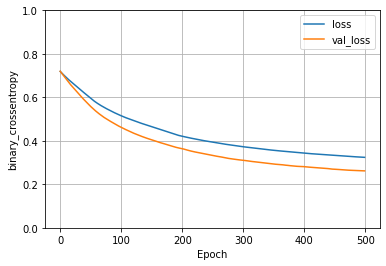

In [40]:
model.evaluate(X_test)
plot_loss(history)

Not necessarily...So when should we stop training a Deep Learning Model?
Answer in the next chapter `Optimizers, Loss, Fitting` of this `Deep Learning Module` !

❓ Let's try a **deeper** architecture that includes : 

- a first layer with 20 neurons (activation: `"relu"`)
- a second layer with 10 neurons (activation: `"relu"`)
- a third layer with 5 neurons (activation: `"relu"`)
- an output layer suited for this problem


In [44]:
def build_and_compile_model():
  model = Sequential([
      layers.Input(shape=(2,)),
      layers.Dense(20, activation='relu'),
      layers.Dense(10, activation='relu'),
      layers.Dense(5, activation='relu'),
      layers.Dense(1, activation="softmax")
  ])
  model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
  model.summary()
  return model

❓ What is the number of parameters of your new model?

In [45]:
model = build_and_compile_model()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 20)                60        
                                                                 
 dense_13 (Dense)            (None, 10)                210       
                                                                 
 dense_14 (Dense)            (None, 5)                 55        
                                                                 
 dense_15 (Dense)            (None, 1)                 6         
                                                                 
Total params: 331
Trainable params: 331
Non-trainable params: 0
_________________________________________________________________


Run your model on the previous data with 500 epochs and plot the loss afterwards.  
❓ What is your accuracy on the test test? Store it as `accuracy_deep` variable (`float`).

In [46]:
history = model.fit(
    X_train,
    y_train,
    #batch_size = 2,
    validation_split=0.2,
    #verbose=0,
    epochs=500,
    )

Epoch 1/500
5/5 [==============================] - 1s 43ms/step - loss: 0.6929 - accuracy: 0.5071 - val_loss: 0.6952 - val_accuracy: 0.4571
Epoch 2/500
5/5 [==============================] - 0s 7ms/step - loss: 0.6891 - accuracy: 0.5071 - val_loss: 0.6911 - val_accuracy: 0.4571
Epoch 3/500
5/5 [==============================] - 0s 8ms/step - loss: 0.6852 - accuracy: 0.5071 - val_loss: 0.6869 - val_accuracy: 0.4571
Epoch 4/500
5/5 [==============================] - 0s 8ms/step - loss: 0.6814 - accuracy: 0.5071 - val_loss: 0.6824 - val_accuracy: 0.4571
Epoch 5/500
5/5 [==============================] - 0s 8ms/step - loss: 0.6775 - accuracy: 0.5071 - val_loss: 0.6774 - val_accuracy: 0.4571
Epoch 6/500
5/5 [==============================] - 0s 7ms/step - loss: 0.6731 - accuracy: 0.5071 - val_loss: 0.6724 - val_accuracy: 0.4571
Epoch 7/500
5/5 [==============================] - 0s 7ms/step - loss: 0.6684 - accuracy: 0.5071 - val_loss: 0.6670 - val_accuracy: 0.4571
Epoch 8/500
5/5 [=========

3/3 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


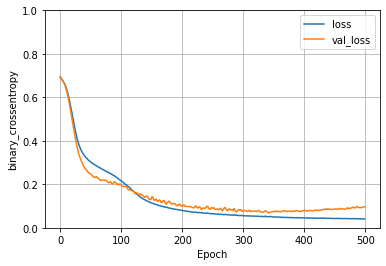

In [47]:
model.evaluate(X_test)
plot_loss(history)

❓ Do you think we have overfitted on the noise? Check it out below

In [53]:
eval = model.evaluate(X_test)
accuracy_deep = eval[0]

3/3 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


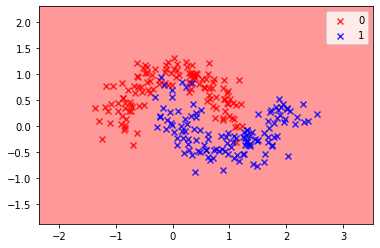

In [52]:
plot_decision_regions(X,y,model)

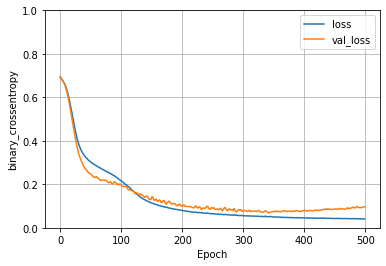

In [56]:
plot_loss(history)

In [66]:
X_test[1]

array([1.67561746, 0.09613805])

In [65]:
X_test[:2]

array([[-0.02274721,  0.06751459],
       [ 1.67561746,  0.09613805]])

In [63]:
X_test[2].reshape(-1,1).shape


(2, 1)

In [68]:
model.predict(X_test[:2])

array([[1.],
       [1.]], dtype=float32)

In [69]:
y_test[:2]

array([1, 1])